# 1.导入库，读入数据。

In [4]:
#导入库：
import os
# import jovian
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
# import opendatasets as od
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [5]:
#读入数据到df里面(dataframe结构)
train_df = pd.read_csv('D:\\Users\\gxy\\OneDrive\\directory\\YJY_BG\\Big_homework\\data\\data.csv')
train_df.head()
#每一列的含义、结构 在另外一个ipynb里面有解释。

,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,trade_type_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,trade_type_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,trade_type_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,trade_type_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,trade_type_last5,curve_based_price_last5
0,1,1,128.596,11.316404,5.95,26.031126,0,1.731,120000,2,127.561201,758762,129.089,200000,2,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,126.673,8.763446,5.95,26.016697,0,30.518,85000,4,126.323528,455028,128.596,120000,2,127.561201,1213791.0,129.089,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,126.880,6.499730,5.95,26.008760,0,4.424,4200000,3,126.761433,250310,126.673,85000,4,126.323528,705339.0,128.596,120000.0,2.0,127.561201,1464101.0,129.089,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,126.362,0.865854,5.95,26.008619,0,43.059,5000001,2,127.025765,4441,126.880,4200000,3,126.761433,254752.0,126.673,85000.0,4.0,126.323528,709781.0,128.596,120000.0,2.0,127.561201,1468543.0,129.089,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN
4,5,1,124.918,11.938543,5.95,25.981840,0,6.332,10000,2,125.736081,844484,126.362,5000001,2,127.025765,848925.0,126.880,4200000.0,3.0,126.761433,1099236.0,126.673,85000.0,4.0,126.323528,1554265.0,128.596,120000.0,2.0,127.561201,2313027.0,129.089,200000.0,2.0,129.435587


In [6]:
#看一下train_df的结构：
train_df
#shape:76767 X 61

,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,trade_type_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,trade_type_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,trade_type_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,trade_type_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,trade_type_last5,curve_based_price_last5
0,1,1,128.596,11.316404,5.95,26.031126,0,1.731,120000,2,127.561201,758762,129.089,200000,2,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,126.673,8.763446,5.95,26.016697,0,30.518,85000,4,126.323528,455028,128.596,120000,2,127.561201,1213791.0,129.089000,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,126.880,6.499730,5.95,26.008760,0,4.424,4200000,3,126.761433,250310,126.673,85000,4,126.323528,705339.0,128.596000,120000.0,2.0,127.561201,1464101.0,129.089000,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,126.362,0.865854,5.95,26.008619,0,43.059,5000001,2,127.025765,4441,126.880,4200000,3,126.761433,254752.0,126.673000,85000.0,4.0,126.323528,709781.0,128.596000,120000.0,2.0,127.561201,1468543.0,129.089000,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN
4,5,1,124.918,11.938543,5.95,25.981840,0,6.332,10000,2,125.736081,844484,126.362,5000001,2,127.025765,848925.0,126.880000,4200000.0,3.0,126.761433,1099236.0,126.673000,85000.0,4.0,126.323528,1554265.0,128.596000,120000.0,2.0,127.561201,2313027.0,129.089000,200000.0,2.0,129.435587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69996,3969,110.738,3.998350,4.25,8.082719,0,7.203,1100000,2,110.108655,94721,112.202,75000,3,111.590057,96256.0,112.722896,47000.0,3.0,111.612830,96571.0,112.237000,47000.0,4.0,111.612830,98843.0,111.261000,50000.0,4.0,111.725945,98852.0,112.929900,50000.0,3.0,111.725945
69996,69997,3969,112.149,0.335268,4.25,8.082698,0,10.635,5000,4,110.221109,665,110.738,1100000,2,110.108655,95386.0,112.202000,75000.0,3.0,111.590057,96921.0,112.722896,47000.0,3.0,111.612830,97236.0,112.237000,47000.0,4.0,111.612830,99508.0,111.261000,50000.0,4.0,111.725945
69997,69998,3969,112.309,0.012991,4.25,8.082698,0,10.636,5000,3,110.221109,0,112.149,5000,4,110.221109,665.0,110.738000,1100000.0,2.0,110.108655,95386.0,112.202000,75000.0,3.0,111.590057,96921.0,112.722896,47000.0,3.0,111.612830,97236.0,112.237000,47000.0,4.0,111.612830
69998,69999,3969,112.149,0.022502,4.25,8.082698,0,48.270,5000,4,110.221109,2,112.309,5000,3,110.221109,2.0,112.149000,5000.0,4.0,110.221109,668.0,110.738000,1100000.0,2.0,110.108655,95389.0,112.202000,75000.0,3.0,111.590057,96924.0,112.722896,47000.0,3.0,111.612830


In [7]:
#查看数据信息：
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        70000 non-null  int64  
 1   bond_id                   70000 non-null  int64  
 2   trade_price               70000 non-null  float64
 3   weight                    70000 non-null  float64
 4   current_coupon            70000 non-null  float64
 5   time_to_maturity          70000 non-null  float64
 6   is_callable               70000 non-null  int64  
 7   reporting_delay           70000 non-null  float64
 8   trade_size                70000 non-null  int64  
 9   trade_type                70000 non-null  int64  
 10  curve_based_price         70000 non-null  float64
 11  received_time_diff_last1  70000 non-null  int64  
 12  trade_price_last1         70000 non-null  float64
 13  trade_size_last1          70000 non-null  int64  
 14  trade_

In [8]:
#查看数据的其他信息：
train_df.describe()

,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,trade_type_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,trade_type_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,trade_type_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,trade_type_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,trade_type_last5,curve_based_price_last5
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,7.000000e+04,7.000000e+04,70000.000000,70000.000000,7.000000e+04,70000.000000,7.000000e+04,70000.000000,70000.000000,6.979400e+04,69794.00000,6.979400e+04,69794.000000,69794.000000,6.958800e+04,69588.000000,6.958800e+04,69588.000000,69588.000000,6.938500e+04,69385.000000,6.938500e+04,69385.000000,69385.000000,6.918300e+04,69183.000000,6.918300e+04,69183.000000,69183.000000
mean,35000.500000,1618.360057,108.641737,1.175349,6.104079,6.335127,0.071386,4.053816e+04,3.232711e+05,3.187800,108.473127,3.993657e+04,108.638776,3.236387e+05,3.187786,108.470663,7.838583e+04,108.62732,3.232268e+05,3.188569,108.459057,1.151657e+05,108.614557,3.229427e+05,3.188581,108.446896,1.509008e+05,108.601346,3.227750e+05,3.188758,108.434452,1.850841e+05,108.588915,3.219122e+05,3.189512,108.422598
std,20207.403759,1170.122144,9.117525,2.314980,1.851687,5.911081,0.257470,1.354585e+06,8.624901e+05,0.788958,9.234149,1.904220e+05,9.119034,8.633172e+05,0.789224,9.235545,2.735328e+05,9.11630,8.630092e+05,0.789196,9.233897,3.384694e+05,9.112627,8.629769e+05,0.789154,9.231861,3.939896e+05,9.109052,8.627957e+05,0.789126,9.229971,4.380881e+05,9.106255,8.615188e+05,0.788955,9.228642
min,1.000000,1.000000,59.933000,0.012991,0.626500,0.112677,0.000000,-5.737300e+01,1.000000e+03,2.000000,60.052193,0.000000e+00,59.933000,1.000000e+03,2.000000,60.052193,0.000000e+00,59.93300,1.000000e+03,2.000000,60.052193,0.000000e+00,59.933000,1.000000e+03,2.000000,60.052193,0.000000e+00,59.933000,1.000000e+03,2.000000,60.052193,0.000000e+00,59.933000,1.000000e+03,2.000000,60.052193
25%,17500.750000,680.000000,102.135000,0.043088,4.700000,2.556779,0.000000,2.504000e+00,1.000000e+04,3.000000,102.011684,1.000000e+01,102.133975,1.000000e+04,3.000000,102.010483,6.840000e+02,102.12800,1.000000e+04,3.000000,102.007673,1.906000e+03,102.125000,1.000000e+04,3.000000,102.005109,3.304000e+03,102.120000,1.000000e+04,3.000000,102.001966,4.807000e+03,102.113000,1.000000e+04,3.000000,101.998650
50%,35000.500000,1282.000000,107.175000,0.306883,6.200000,4.696821,0.000000,1.027600e+01,2.500000e+04,3.000000,107.138535,5.570000e+02,107.170100,2.500000e+04,3.000000,107.134756,3.722000e+03,107.16300,2.500000e+04,3.000000,107.123989,7.829500e+03,107.157000,2.500000e+04,3.000000,107.117410,1.423000e+04,107.150000,2.500000e+04,3.000000,107.107275,6.431000e+04,107.143000,2.500000e+04,3.000000,107.099801
75%,52500.250000,2473.000000,113.272670,0.950260,7.375000,7.614185,0.000000,3.806825e+01,1.500000e+05,4.000000,113.191483,5.349250e+03,113.263000,1.500000e+05,4.000000,113.187608,6.538125e+04,113.25000,1.500000e+05,4.000000,113.170723,8.132150e+04,113.246000,1.500000e+05,4.000000,113.163805,9.690800e+04,113.236000,1.500000e+05,4.000000,113.152883,1.742735e+05,113.221000,1.500000e+05,4.000000,113.142625
max,70000.000000,3969.000000,153.832000,39.173278,13.500000,28.329798,1.000000,7.195752e+07,5.000001e+06,4.000000,153.239602,9.092201e+06,153.832000,5.000001e+06,4.000000,153.239602,1.080817e+07,153.83200,5.000001e+06,4.000000,153.239602,1.150356e+07,153.832000,5.000001e+06,4.000000,153.239602,1.175081e+07,153.832000,5.000001e+06,4.000000,153.239602,1.175086e+07,153.832000,5.000001e+06,4.000000,153.239602


# 2.接下来开始做数据处理和特征工程


In [9]:
#观察一下train_df:
train_df

,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,trade_type_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,trade_type_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,trade_type_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,trade_type_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,trade_type_last5,curve_based_price_last5
0,1,1,128.596,11.316404,5.95,26.031126,0,1.731,120000,2,127.561201,758762,129.089,200000,2,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,126.673,8.763446,5.95,26.016697,0,30.518,85000,4,126.323528,455028,128.596,120000,2,127.561201,1213791.0,129.089000,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,126.880,6.499730,5.95,26.008760,0,4.424,4200000,3,126.761433,250310,126.673,85000,4,126.323528,705339.0,128.596000,120000.0,2.0,127.561201,1464101.0,129.089000,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,126.362,0.865854,5.95,26.008619,0,43.059,5000001,2,127.025765,4441,126.880,4200000,3,126.761433,254752.0,126.673000,85000.0,4.0,126.323528,709781.0,128.596000,120000.0,2.0,127.561201,1468543.0,129.089000,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN
4,5,1,124.918,11.938543,5.95,25.981840,0,6.332,10000,2,125.736081,844484,126.362,5000001,2,127.025765,848925.0,126.880000,4200000.0,3.0,126.761433,1099236.0,126.673000,85000.0,4.0,126.323528,1554265.0,128.596000,120000.0,2.0,127.561201,2313027.0,129.089000,200000.0,2.0,129.435587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69996,3969,110.738,3.998350,4.25,8.082719,0,7.203,1100000,2,110.108655,94721,112.202,75000,3,111.590057,96256.0,112.722896,47000.0,3.0,111.612830,96571.0,112.237000,47000.0,4.0,111.612830,98843.0,111.261000,50000.0,4.0,111.725945,98852.0,112.929900,50000.0,3.0,111.725945
69996,69997,3969,112.149,0.335268,4.25,8.082698,0,10.635,5000,4,110.221109,665,110.738,1100000,2,110.108655,95386.0,112.202000,75000.0,3.0,111.590057,96921.0,112.722896,47000.0,3.0,111.612830,97236.0,112.237000,47000.0,4.0,111.612830,99508.0,111.261000,50000.0,4.0,111.725945
69997,69998,3969,112.309,0.012991,4.25,8.082698,0,10.636,5000,3,110.221109,0,112.149,5000,4,110.221109,665.0,110.738000,1100000.0,2.0,110.108655,95386.0,112.202000,75000.0,3.0,111.590057,96921.0,112.722896,47000.0,3.0,111.612830,97236.0,112.237000,47000.0,4.0,111.612830
69998,69999,3969,112.149,0.022502,4.25,8.082698,0,48.270,5000,4,110.221109,2,112.309,5000,3,110.221109,2.0,112.149000,5000.0,4.0,110.221109,668.0,110.738000,1100000.0,2.0,110.108655,95389.0,112.202000,75000.0,3.0,111.590057,96924.0,112.722896,47000.0,3.0,111.612830


**选择前60w条数据作为训练数据、60万到70万之间的数据作为测试数据**

（也可以之后选择随机划分）因为数据都是按照Bond_id进行排好序的，所以最好还是打乱一点，训练的效果会更好。

## 2.1形成训练数据和测试数据

In [10]:
#借助 dataframe 的iloc进行数据的切片
X_train = train_df.iloc[:60000,:36].copy() 

X_test = train_df.iloc[60000:70000,:36].copy() 

In [11]:
X_train

,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,trade_type_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,trade_type_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,trade_type_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,trade_type_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,trade_type_last5,curve_based_price_last5
0,1,1,128.596,11.316404,5.950,26.031126,0,1.731,120000,2,127.561201,758762,129.0890,200000,2,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,126.673,8.763446,5.950,26.016697,0,30.518,85000,4,126.323528,455028,128.5960,120000,2,127.561201,1213791.0,129.0890,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,126.880,6.499730,5.950,26.008760,0,4.424,4200000,3,126.761433,250310,126.6730,85000,4,126.323528,705339.0,128.5960,120000.0,2.0,127.561201,1464101.0,129.0890,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,126.362,0.865854,5.950,26.008619,0,43.059,5000001,2,127.025765,4441,126.8800,4200000,3,126.761433,254752.0,126.6730,85000.0,4.0,126.323528,709781.0,128.5960,120000.0,2.0,127.561201,1468543.0,129.0890,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN
4,5,1,124.918,11.938543,5.950,25.981840,0,6.332,10000,2,125.736081,844484,126.3620,5000001,2,127.025765,848925.0,126.8800,4200000.0,3.0,126.761433,1099236.0,126.6730,85000.0,4.0,126.323528,1554265.0,128.5960,120000.0,2.0,127.561201,2313027.0,129.0890,200000.0,2.0,129.435587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59996,3444,112.255,0.248879,4.625,8.241869,0,637.309,17000,4,112.486793,366,112.7762,17000,4,112.553350,589.0,112.3730,17000.0,4.0,112.553350,4375.0,110.8000,17000.0,4.0,112.725690,12349.0,113.1130,4000000.0,3.0,112.386141,14491.0,110.7510,17000.0,4.0,112.446411
59996,59997,3444,113.258,3.550738,4.625,8.239500,0,20.047,200000,3,112.279619,74700,112.2550,17000,4,112.486793,75066.0,112.7762,17000.0,4.0,112.553350,75290.0,112.3730,17000.0,4.0,112.553350,79076.0,110.8000,17000.0,4.0,112.725690,87050.0,113.1130,4000000.0,3.0,112.386141
59997,59998,3444,111.502,0.756406,4.625,8.239393,0,12.268,15000,2,112.212177,3389,113.2580,200000,3,112.279619,78089.0,112.2550,17000.0,4.0,112.486793,78456.0,112.7762,17000.0,4.0,112.553350,78679.0,112.3730,17000.0,4.0,112.553350,82465.0,110.8000,17000.0,4.0,112.725690
59998,59999,3444,113.103,0.869647,4.625,8.239251,0,1.452,3705000,2,112.350143,4480,111.5020,15000,2,112.212177,7869.0,113.2580,200000.0,3.0,112.279619,82570.0,112.2550,17000.0,4.0,112.486793,82936.0,112.7762,17000.0,4.0,112.553350,83159.0,112.3730,17000.0,4.0,112.553350


In [12]:
X_test

,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,trade_type_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,trade_type_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,trade_type_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,trade_type_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,trade_type_last5,curve_based_price_last5
60000,60001,3444,113.504,6.472812,4.625,8.231376,0,118.559,370000,4,112.302316,248241,113.123,3705000,3,112.401559,248351.0,113.103000,3705000.0,2.0,112.350143,252831.0,111.502000,15000.0,2.0,112.212177,256220.0,113.258000,200000.0,3.0,112.279619,330921.0,112.255000,17000.0,4.0,112.486793
60001,60002,3444,113.536,0.085190,4.625,8.231374,0,6.518,370000,4,112.302316,42,113.504,370000,4,112.302316,248284.0,113.123000,3705000.0,3.0,112.401559,248394.0,113.103000,3705000.0,2.0,112.350143,252874.0,111.502000,15000.0,2.0,112.212177,256263.0,113.258000,200000.0,3.0,112.279619
60002,60003,3444,113.891,0.876317,4.625,8.231230,0,1.406,2000000,3,112.878133,4549,113.536,370000,4,112.302316,4592.0,113.504000,370000.0,4.0,112.302316,252833.0,113.123000,3705000.0,3.0,112.401559,252943.0,113.103000,3705000.0,2.0,112.350143,257424.0,111.502000,15000.0,2.0,112.212177
60003,60004,3444,114.041,0.798310,4.625,8.231110,0,5.568,10000,4,113.067126,3775,113.891,2000000,3,112.878133,8325.0,113.536000,370000.0,4.0,112.302316,8368.0,113.504000,370000.0,4.0,112.302316,256609.0,113.123000,3705000.0,3.0,112.401559,256719.0,113.103000,3705000.0,2.0,112.350143
60004,60005,3444,114.041,0.293674,4.625,8.231094,0,2.127,10000,3,113.066583,510,114.041,10000,4,113.067126,4285.0,113.891000,2000000.0,3.0,112.878133,8835.0,113.536000,370000.0,4.0,112.302316,8878.0,113.504000,370000.0,4.0,112.302316,257119.0,113.123000,3705000.0,3.0,112.401559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69996,3969,110.738,3.998350,4.250,8.082719,0,7.203,1100000,2,110.108655,94721,112.202,75000,3,111.590057,96256.0,112.722896,47000.0,3.0,111.612830,96571.0,112.237000,47000.0,4.0,111.612830,98843.0,111.261000,50000.0,4.0,111.725945,98852.0,112.929900,50000.0,3.0,111.725945
69996,69997,3969,112.149,0.335268,4.250,8.082698,0,10.635,5000,4,110.221109,665,110.738,1100000,2,110.108655,95386.0,112.202000,75000.0,3.0,111.590057,96921.0,112.722896,47000.0,3.0,111.612830,97236.0,112.237000,47000.0,4.0,111.612830,99508.0,111.261000,50000.0,4.0,111.725945
69997,69998,3969,112.309,0.012991,4.250,8.082698,0,10.636,5000,3,110.221109,0,112.149,5000,4,110.221109,665.0,110.738000,1100000.0,2.0,110.108655,95386.0,112.202000,75000.0,3.0,111.590057,96921.0,112.722896,47000.0,3.0,111.612830,97236.0,112.237000,47000.0,4.0,111.612830
69998,69999,3969,112.149,0.022502,4.250,8.082698,0,48.270,5000,4,110.221109,2,112.309,5000,3,110.221109,2.0,112.149000,5000.0,4.0,110.221109,668.0,110.738000,1100000.0,2.0,110.108655,95389.0,112.202000,75000.0,3.0,111.590057,96924.0,112.722896,47000.0,3.0,111.612830


观察数据里面所有的列之后得到所有特征的名称：

In [13]:
#id , bound_id ,weight对于数据本身来说是没用的。
#输入的特征名称：
inputs_cols = ['current_coupon',
       'time_to_maturity', 'is_callable', 'reporting_delay', 'trade_size',
       'trade_type', 'curve_based_price', 'received_time_diff_last1',
       'trade_price_last1', 'trade_size_last1', 'trade_type_last1',
       'curve_based_price_last1', 'received_time_diff_last2',
       'trade_price_last2', 'trade_size_last2', 'trade_type_last2',
       'curve_based_price_last2', 'received_time_diff_last3',
       'trade_price_last3', 'trade_size_last3', 'trade_type_last3',
       'curve_based_price_last3', 'received_time_diff_last4',
       'trade_price_last4', 'trade_size_last4', 'trade_type_last4',
       'curve_based_price_last4', 'received_time_diff_last5',
       'trade_price_last5', 'trade_size_last5', 'trade_type_last5',
       'curve_based_price_last5']
#要预测的名称：
target_col = ['trade_price']

根据上面的 inputs_cols 和 target_col创建训练集的样本数据和标签数据。
测试集合的样本数据和标签数据。

In [14]:
train_inputs = X_train[inputs_cols].copy()
train_target = X_train[target_col].copy()
test_inputs = X_test[inputs_cols].copy()
test_target = X_test[target_col].copy()

In [15]:
train_inputs

,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,trade_type_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,trade_type_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,trade_type_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,trade_type_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,trade_type_last5,curve_based_price_last5
0,5.950,26.031126,0,1.731,120000,2,127.561201,758762,129.0890,200000,2,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.950,26.016697,0,30.518,85000,4,126.323528,455028,128.5960,120000,2,127.561201,1213791.0,129.0890,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.950,26.008760,0,4.424,4200000,3,126.761433,250310,126.6730,85000,4,126.323528,705339.0,128.5960,120000.0,2.0,127.561201,1464101.0,129.0890,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.950,26.008619,0,43.059,5000001,2,127.025765,4441,126.8800,4200000,3,126.761433,254752.0,126.6730,85000.0,4.0,126.323528,709781.0,128.5960,120000.0,2.0,127.561201,1468543.0,129.0890,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN
4,5.950,25.981840,0,6.332,10000,2,125.736081,844484,126.3620,5000001,2,127.025765,848925.0,126.8800,4200000.0,3.0,126.761433,1099236.0,126.6730,85000.0,4.0,126.323528,1554265.0,128.5960,120000.0,2.0,127.561201,2313027.0,129.0890,200000.0,2.0,129.435587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,4.625,8.241869,0,637.309,17000,4,112.486793,366,112.7762,17000,4,112.553350,589.0,112.3730,17000.0,4.0,112.553350,4375.0,110.8000,17000.0,4.0,112.725690,12349.0,113.1130,4000000.0,3.0,112.386141,14491.0,110.7510,17000.0,4.0,112.446411
59996,4.625,8.239500,0,20.047,200000,3,112.279619,74700,112.2550,17000,4,112.486793,75066.0,112.7762,17000.0,4.0,112.553350,75290.0,112.3730,17000.0,4.0,112.553350,79076.0,110.8000,17000.0,4.0,112.725690,87050.0,113.1130,4000000.0,3.0,112.386141
59997,4.625,8.239393,0,12.268,15000,2,112.212177,3389,113.2580,200000,3,112.279619,78089.0,112.2550,17000.0,4.0,112.486793,78456.0,112.7762,17000.0,4.0,112.553350,78679.0,112.3730,17000.0,4.0,112.553350,82465.0,110.8000,17000.0,4.0,112.725690
59998,4.625,8.239251,0,1.452,3705000,2,112.350143,4480,111.5020,15000,2,112.212177,7869.0,113.2580,200000.0,3.0,112.279619,82570.0,112.2550,17000.0,4.0,112.486793,82936.0,112.7762,17000.0,4.0,112.553350,83159.0,112.3730,17000.0,4.0,112.553350


In [16]:
train_target

,trade_price
0,128.596
1,126.673
2,126.880
3,126.362
4,124.918
...,...
59995,112.255
59996,113.258
59997,111.502
59998,113.103


In [17]:
test_inputs

,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,trade_type_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,trade_type_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,trade_type_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,trade_type_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,trade_type_last5,curve_based_price_last5
60000,4.625,8.231376,0,118.559,370000,4,112.302316,248241,113.123,3705000,3,112.401559,248351.0,113.103000,3705000.0,2.0,112.350143,252831.0,111.502000,15000.0,2.0,112.212177,256220.0,113.258000,200000.0,3.0,112.279619,330921.0,112.255000,17000.0,4.0,112.486793
60001,4.625,8.231374,0,6.518,370000,4,112.302316,42,113.504,370000,4,112.302316,248284.0,113.123000,3705000.0,3.0,112.401559,248394.0,113.103000,3705000.0,2.0,112.350143,252874.0,111.502000,15000.0,2.0,112.212177,256263.0,113.258000,200000.0,3.0,112.279619
60002,4.625,8.231230,0,1.406,2000000,3,112.878133,4549,113.536,370000,4,112.302316,4592.0,113.504000,370000.0,4.0,112.302316,252833.0,113.123000,3705000.0,3.0,112.401559,252943.0,113.103000,3705000.0,2.0,112.350143,257424.0,111.502000,15000.0,2.0,112.212177
60003,4.625,8.231110,0,5.568,10000,4,113.067126,3775,113.891,2000000,3,112.878133,8325.0,113.536000,370000.0,4.0,112.302316,8368.0,113.504000,370000.0,4.0,112.302316,256609.0,113.123000,3705000.0,3.0,112.401559,256719.0,113.103000,3705000.0,2.0,112.350143
60004,4.625,8.231094,0,2.127,10000,3,113.066583,510,114.041,10000,4,113.067126,4285.0,113.891000,2000000.0,3.0,112.878133,8835.0,113.536000,370000.0,4.0,112.302316,8878.0,113.504000,370000.0,4.0,112.302316,257119.0,113.123000,3705000.0,3.0,112.401559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,4.250,8.082719,0,7.203,1100000,2,110.108655,94721,112.202,75000,3,111.590057,96256.0,112.722896,47000.0,3.0,111.612830,96571.0,112.237000,47000.0,4.0,111.612830,98843.0,111.261000,50000.0,4.0,111.725945,98852.0,112.929900,50000.0,3.0,111.725945
69996,4.250,8.082698,0,10.635,5000,4,110.221109,665,110.738,1100000,2,110.108655,95386.0,112.202000,75000.0,3.0,111.590057,96921.0,112.722896,47000.0,3.0,111.612830,97236.0,112.237000,47000.0,4.0,111.612830,99508.0,111.261000,50000.0,4.0,111.725945
69997,4.250,8.082698,0,10.636,5000,3,110.221109,0,112.149,5000,4,110.221109,665.0,110.738000,1100000.0,2.0,110.108655,95386.0,112.202000,75000.0,3.0,111.590057,96921.0,112.722896,47000.0,3.0,111.612830,97236.0,112.237000,47000.0,4.0,111.612830
69998,4.250,8.082698,0,48.270,5000,4,110.221109,2,112.309,5000,3,110.221109,2.0,112.149000,5000.0,4.0,110.221109,668.0,110.738000,1100000.0,2.0,110.108655,95389.0,112.202000,75000.0,3.0,111.590057,96924.0,112.722896,47000.0,3.0,111.612830


In [18]:
test_target

,trade_price
60000,113.504
60001,113.536
60002,113.891
60003,114.041
60004,114.041
...,...
69995,110.738
69996,112.149
69997,112.309
69998,112.149


target现在是dataframe结构，而且是二维的。
我们转换为1维的数组，方便后面计算。

In [19]:
train_target1 = train_target.values.flatten()
test_target1 = test_target.values.flatten()

#解释：
#这段代码的作用是将 train_target 数据转换为一维数组，以便可以用于机器学习模型，特别是当使用 sklearn 时
#train_target 是一个 Pandas DataFrame 或 Series，其中包含了训练数据的目标值
#train_target.values 是 Pandas 的一种访问方式，用来提取 DataFrame 或 Series 中的值，并返回一个 NumPy 数组。
#flatten() 是 NumPy 数组的一种方法，它将一个多维数组转换为一维数组。
#如果 train_target.values 是一个二维数组，flatten() 方法会将其展开成一个一维数组，使得每个元素都按顺序排列。

In [20]:
print(train_target1)
print(type(train_target1))
#可以看到 展开之后 第一个样本的值 就在数组的第一个元素。

[128.596 126.673 126.88  ... 111.502 113.103 113.123]
<class 'numpy.ndarray'>


## 2.2区分数据特征的类别，方便之后对于表示类别的特征数据进行**独热编码**

根据特征的数据类别区分好了数据类型：

In [21]:
#这里已经全部弄好了。
#对于输入的数据的类型的分类：
numeric_cols = ['current_coupon',
       'time_to_maturity', 'reporting_delay', 'trade_size',
       'curve_based_price', 'received_time_diff_last1',
       'trade_price_last1', 'trade_size_last1',
       'curve_based_price_last1', 'received_time_diff_last2',
       'trade_price_last2', 'trade_size_last2',
       'curve_based_price_last2', 'received_time_diff_last3',
       'trade_price_last3', 'trade_size_last3',
       'curve_based_price_last3', 'received_time_diff_last4',
       'trade_price_last4', 'trade_size_last4',
       'curve_based_price_last4', 'received_time_diff_last5',
       'trade_price_last5', 'trade_size_last5',
       'curve_based_price_last5']

categorical_cols = ['is_callable', 'trade_type', 'trade_type_last1', 'trade_type_last2', 'trade_type_last3', 'trade_type_last4', 'trade_type_last5']

## 2.3对数值数据进行缺失值、异常值处理

在机器学习中，许多模型无法处理缺失的数值数据。插补（Imputation） 是一种填充缺失值的过程，其目的是为缺失的数据找到一个合理的替代值，使得模型可以继续处理数据。

使用 SimpleImputer 类进行均值插补
SimpleImputer 是 sklearn.impute 模块中的一个类，用于简单的数据插补。我们将使用这个类来实现均值插补.

这里选择简单的均值插补!

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean').fit(train_df[numeric_cols])

#SimpleImputer(strategy='mean') 创建了一个 SimpleImputer 对象，并设置了 strategy='mean'，即用每列的均值来填充缺失值。
#.fit(train_df[numeric_cols]) 是 SimpleImputer 的 fit() 方法，它根据 train_df 中的数值型列（由 numeric_cols 指定）计算每列的均值

In [23]:
#检查一下异常值个数：
train_inputs[numeric_cols].isna().sum()

current_coupon                0
time_to_maturity              0
reporting_delay               0
trade_size                    0
curve_based_price             0
received_time_diff_last1      0
trade_price_last1             0
trade_size_last1              0
curve_based_price_last1       0
received_time_diff_last2    177
trade_price_last2           177
trade_size_last2            177
curve_based_price_last2     177
received_time_diff_last3    354
trade_price_last3           354
trade_size_last3            354
curve_based_price_last3     354
received_time_diff_last4    528
trade_price_last4           528
trade_size_last4            528
curve_based_price_last4     528
received_time_diff_last5    702
trade_price_last5           702
trade_size_last5            702
curve_based_price_last5     702
dtype: int64

In [24]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])

In [25]:
train_inputs[numeric_cols].isna().sum()


current_coupon              0
time_to_maturity            0
reporting_delay             0
trade_size                  0
curve_based_price           0
received_time_diff_last1    0
trade_price_last1           0
trade_size_last1            0
curve_based_price_last1     0
received_time_diff_last2    0
trade_price_last2           0
trade_size_last2            0
curve_based_price_last2     0
received_time_diff_last3    0
trade_price_last3           0
trade_size_last3            0
curve_based_price_last3     0
received_time_diff_last4    0
trade_price_last4           0
trade_size_last4            0
curve_based_price_last4     0
received_time_diff_last5    0
trade_price_last5           0
trade_size_last5            0
curve_based_price_last5     0
dtype: int64

对test集合也进行表示数据的特征的缺失值处理：

In [26]:
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

## 2.4对特征进行缩放

特征缩放（Feature Scaling） 是一个重要的步骤，尤其是当不同特征的值范围差异较大时。不同的数值范围会导致某些特征在模型训练过程中对损失函数的影响过大，从而使模型训练不稳定或收敛速度变慢。通过缩放特征到相同的范围（例如 $(0, 1)$ 或 $(-1, 1)$），可以确保每个特征对模型的贡献是平等的。

我们数据集中的数值列具有不同的范围。

让我们使用 sklearn.preprocessing 中的 MinMaxScaler 来将数值缩放到 $(0,1)$ 范围。

In [27]:
train_inputs[numeric_cols]

,current_coupon,time_to_maturity,reporting_delay,trade_size,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,curve_based_price_last5
0,5.950,26.031126,1.731,120000.0,127.561201,758762.0,129.0890,200000.0,129.435587,7.838583e+04,108.62732,3.232268e+05,108.459057,1.151657e+05,108.614557,322942.724105,108.446896,1.509008e+05,108.601346,3.227750e+05,108.434452,1.850841e+05,108.588915,3.219122e+05,108.422598
1,5.950,26.016697,30.518,85000.0,126.323528,455028.0,128.5960,120000.0,127.561201,1.213791e+06,129.08900,2.000000e+05,129.435587,1.151657e+05,108.614557,322942.724105,108.446896,1.509008e+05,108.601346,3.227750e+05,108.434452,1.850841e+05,108.588915,3.219122e+05,108.422598
2,5.950,26.008760,4.424,4200000.0,126.761433,250310.0,126.6730,85000.0,126.323528,7.053390e+05,128.59600,1.200000e+05,127.561201,1.464101e+06,129.089000,200000.000000,129.435587,1.509008e+05,108.601346,3.227750e+05,108.434452,1.850841e+05,108.588915,3.219122e+05,108.422598
3,5.950,26.008619,43.059,5000001.0,127.025765,4441.0,126.8800,4200000.0,126.761433,2.547520e+05,126.67300,8.500000e+04,126.323528,7.097810e+05,128.596000,120000.000000,127.561201,1.468543e+06,129.089000,2.000000e+05,129.435587,1.850841e+05,108.588915,3.219122e+05,108.422598
4,5.950,25.981840,6.332,10000.0,125.736081,844484.0,126.3620,5000001.0,127.025765,8.489250e+05,126.88000,4.200000e+06,126.761433,1.099236e+06,126.673000,85000.000000,126.323528,1.554265e+06,128.596000,1.200000e+05,127.561201,2.313027e+06,129.089000,2.000000e+05,129.435587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,4.625,8.241869,637.309,17000.0,112.486793,366.0,112.7762,17000.0,112.553350,5.890000e+02,112.37300,1.700000e+04,112.553350,4.375000e+03,110.800000,17000.000000,112.725690,1.234900e+04,113.113000,4.000000e+06,112.386141,1.449100e+04,110.751000,1.700000e+04,112.446411
59996,4.625,8.239500,20.047,200000.0,112.279619,74700.0,112.2550,17000.0,112.486793,7.506600e+04,112.77620,1.700000e+04,112.553350,7.529000e+04,112.373000,17000.000000,112.553350,7.907600e+04,110.800000,1.700000e+04,112.725690,8.705000e+04,113.113000,4.000000e+06,112.386141
59997,4.625,8.239393,12.268,15000.0,112.212177,3389.0,113.2580,200000.0,112.279619,7.808900e+04,112.25500,1.700000e+04,112.486793,7.845600e+04,112.776200,17000.000000,112.553350,7.867900e+04,112.373000,1.700000e+04,112.553350,8.246500e+04,110.800000,1.700000e+04,112.725690
59998,4.625,8.239251,1.452,3705000.0,112.350143,4480.0,111.5020,15000.0,112.212177,7.869000e+03,113.25800,2.000000e+05,112.279619,8.257000e+04,112.255000,17000.000000,112.486793,8.293600e+04,112.776200,1.700000e+04,112.553350,8.315900e+04,112.373000,1.700000e+04,112.553350


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(train_df[numeric_cols])
#调库，这里的方式，跟上面的补充缺失值 是一样的。
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])
#同时 测试数据也进行了特征处理。

In [29]:
train_inputs[numeric_cols]

,current_coupon,time_to_maturity,reporting_delay,trade_size,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,curve_based_price_last5
0,0.413524,0.918536,8.213729e-07,0.023805,0.724443,0.083452,0.736493,0.039808,0.744558,0.007252,0.518582,0.064458,0.519457,0.010011,0.518446,0.064401,0.519327,0.012842,0.518305,0.064368,0.519193,0.015751,0.518173,0.064195,0.519066
1,0.413524,0.918025,1.221428e-06,0.016803,0.711162,0.050046,0.731243,0.023805,0.724443,0.112303,0.736493,0.039808,0.744558,0.010011,0.518446,0.064401,0.519327,0.012842,0.518305,0.064368,0.519193,0.015751,0.518173,0.064195,0.519066
2,0.413524,0.917744,8.587977e-07,0.839968,0.715861,0.027530,0.710764,0.016803,0.711162,0.065260,0.731243,0.023805,0.724443,0.127274,0.736493,0.039808,0.744558,0.012842,0.518305,0.064368,0.519193,0.015751,0.518173,0.064195,0.519066
3,0.413524,0.917739,1.395711e-06,1.000000,0.718698,0.000488,0.712968,0.839968,0.715861,0.023570,0.710764,0.016803,0.711162,0.061701,0.731243,0.023805,0.724443,0.124974,0.736493,0.039808,0.744558,0.015751,0.518173,0.064195,0.519066
4,0.413524,0.916790,8.853133e-07,0.001800,0.704858,0.092880,0.707452,1.000000,0.718698,0.078545,0.712968,0.839968,0.715861,0.095556,0.710764,0.016803,0.711162,0.132269,0.731243,0.023805,0.724443,0.196839,0.736493,0.039808,0.744558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.310599,0.288094,9.654050e-06,0.003201,0.562679,0.000040,0.562766,0.003201,0.563393,0.000054,0.558472,0.003201,0.563393,0.000380,0.541720,0.003201,0.565243,0.001051,0.566353,0.799960,0.561599,0.001233,0.541199,0.003201,0.562246
59996,0.310599,0.288010,1.075912e-06,0.039808,0.560456,0.008216,0.557216,0.003201,0.562679,0.006945,0.562766,0.003201,0.563393,0.006545,0.558472,0.003201,0.563393,0.006729,0.541720,0.003201,0.565243,0.007408,0.566353,0.799960,0.561599
59997,0.310599,0.288007,9.678064e-07,0.002801,0.559732,0.000373,0.567897,0.039808,0.560456,0.007225,0.557216,0.003201,0.562679,0.006820,0.562766,0.003201,0.563393,0.006696,0.558472,0.003201,0.563393,0.007018,0.541720,0.003201,0.565243
59998,0.310599,0.288002,8.174956e-07,0.740948,0.561213,0.000493,0.549196,0.002801,0.559732,0.000728,0.567897,0.039808,0.560456,0.007178,0.557216,0.003201,0.562679,0.007058,0.562766,0.003201,0.563393,0.007077,0.558472,0.003201,0.563393


## 编码分类数据

由于机器学习模型只能使用数值数据进行训练，我们需要将分类数据转换为数字。常用的技术是对分类列使用 独热编码（One-hot Encoding）。


独热编码涉及为分类列中的每个唯一类别添加一个新的二进制（0/1）列。

In [30]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['is_callable_0', 'is_callable_1', 'trade_type_2', 'trade_type_3', 'trade_type_4', 'trade_type_last1_2', 'trade_type_last1_3', 'trade_type_last1_4', 'trade_type_last2_2.0', 'trade_type_last2_3.0', 'trade_type_last2_4.0', 'trade_type_last2_nan', 'trade_type_last3_2.0', 'trade_type_last3_3.0', 'trade_type_last3_4.0', 'trade_type_last3_nan', 'trade_type_last4_2.0', 'trade_type_last4_3.0', 'trade_type_last4_4.0', 'trade_type_last4_nan', 'trade_type_last5_2.0', 'trade_type_last5_3.0', 'trade_type_last5_4.0', 'trade_type_last5_nan']


In [31]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

train_inputs

In [32]:
#看一下当前数据 现在是将所有的东西 都放在一起 把离散的分类特征进行了encode。添加在了后面
train_inputs

,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,trade_type_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,trade_type_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,trade_type_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,trade_type_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,trade_type_last5,curve_based_price_last5,is_callable_0,is_callable_1,trade_type_2,trade_type_3,trade_type_4,trade_type_last1_2,trade_type_last1_3,trade_type_last1_4,trade_type_last2_2.0,trade_type_last2_3.0,trade_type_last2_4.0,trade_type_last2_nan,trade_type_last3_2.0,trade_type_last3_3.0,trade_type_last3_4.0,trade_type_last3_nan,trade_type_last4_2.0,trade_type_last4_3.0,trade_type_last4_4.0,trade_type_last4_nan,trade_type_last5_2.0,trade_type_last5_3.0,trade_type_last5_4.0,trade_type_last5_nan
0,0.413524,0.918536,0,8.213729e-07,0.023805,2,0.724443,0.083452,0.736493,0.039808,2,0.744558,0.007252,0.518582,0.064458,NaN,0.519457,0.010011,0.518446,0.064401,NaN,0.519327,0.012842,0.518305,0.064368,NaN,0.519193,0.015751,0.518173,0.064195,NaN,0.519066,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.413524,0.918025,0,1.221428e-06,0.016803,4,0.711162,0.050046,0.731243,0.023805,2,0.724443,0.112303,0.736493,0.039808,2.0,0.744558,0.010011,0.518446,0.064401,NaN,0.519327,0.012842,0.518305,0.064368,NaN,0.519193,0.015751,0.518173,0.064195,NaN,0.519066,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.413524,0.917744,0,8.587977e-07,0.839968,3,0.715861,0.027530,0.710764,0.016803,4,0.711162,0.065260,0.731243,0.023805,2.0,0.724443,0.127274,0.736493,0.039808,2.0,0.744558,0.012842,0.518305,0.064368,NaN,0.519193,0.015751,0.518173,0.064195,NaN,0.519066,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.413524,0.917739,0,1.395711e-06,1.000000,2,0.718698,0.000488,0.712968,0.839968,3,0.715861,0.023570,0.710764,0.016803,4.0,0.711162,0.061701,0.731243,0.023805,2.0,0.724443,0.124974,0.736493,0.039808,2.0,0.744558,0.015751,0.518173,0.064195,NaN,0.519066,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.413524,0.916790,0,8.853133e-07,0.001800,2,0.704858,0.092880,0.707452,1.000000,2,0.718698,0.078545,0.712968,0.839968,3.0,0.715861,0.095556,0.710764,0.016803,4.0,0.711162,0.132269,0.731243,0.023805,2.0,0.724443,0.196839,0.736493,0.039808,2.0,0.744558,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.310599,0.288094,0,9.654050e-06,0.003201,4,0.562679,0.000040,0.562766,0.003201,4,0.563393,0.000054,0.558472,0.003201,4.0,0.563393,0.000380,0.541720,0.003201,4.0,0.565243,0.001051,0.566353,0.799960,3.0,0.561599,0.001233,0.541199,0.003201,4.0,0.562246,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
59996,0.310599,0.288010,0,1.075912e-06,0.039808,3,0.560456,0.008216,0.557216,0.003201,4,0.562679,0.006945,0.562766,0.003201,4.0,0.563393,0.006545,0.558472,0.003201,4.0,0.563393,0.006729,0.541720,0.003201,4.0,0.565243,0.007408,0.566353,0.799960,3.0,0.561599,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
59997,0.310599,0.288007,0,9.678064e-07,0.002801,2,0.559732,0.000373,0.567897,0.039808,3,0.560456,0.007225,0.557216,0.003201,4.0,0.562679,0.006820,0.562766,0.003201,4.0,0.563393,0.006696,0.558472,0.003201,4.0,0.563393,0.007018,0.541720,0.003201,4.0,0.56524

In [33]:
#把原先数据里面的categorical_cols剔除掉，就得到了最终的数据。
train = train_inputs[numeric_cols + encoded_cols]
test = test_inputs[numeric_cols + encoded_cols]

In [34]:
train

,current_coupon,time_to_maturity,reporting_delay,trade_size,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,curve_based_price_last5,is_callable_0,is_callable_1,trade_type_2,trade_type_3,trade_type_4,trade_type_last1_2,trade_type_last1_3,trade_type_last1_4,trade_type_last2_2.0,trade_type_last2_3.0,trade_type_last2_4.0,trade_type_last2_nan,trade_type_last3_2.0,trade_type_last3_3.0,trade_type_last3_4.0,trade_type_last3_nan,trade_type_last4_2.0,trade_type_last4_3.0,trade_type_last4_4.0,trade_type_last4_nan,trade_type_last5_2.0,trade_type_last5_3.0,trade_type_last5_4.0,trade_type_last5_nan
0,0.413524,0.918536,8.213729e-07,0.023805,0.724443,0.083452,0.736493,0.039808,0.744558,0.007252,0.518582,0.064458,0.519457,0.010011,0.518446,0.064401,0.519327,0.012842,0.518305,0.064368,0.519193,0.015751,0.518173,0.064195,0.519066,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.413524,0.918025,1.221428e-06,0.016803,0.711162,0.050046,0.731243,0.023805,0.724443,0.112303,0.736493,0.039808,0.744558,0.010011,0.518446,0.064401,0.519327,0.012842,0.518305,0.064368,0.519193,0.015751,0.518173,0.064195,0.519066,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.413524,0.917744,8.587977e-07,0.839968,0.715861,0.027530,0.710764,0.016803,0.711162,0.065260,0.731243,0.023805,0.724443,0.127274,0.736493,0.039808,0.744558,0.012842,0.518305,0.064368,0.519193,0.015751,0.518173,0.064195,0.519066,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.413524,0.917739,1.395711e-06,1.000000,0.718698,0.000488,0.712968,0.839968,0.715861,0.023570,0.710764,0.016803,0.711162,0.061701,0.731243,0.023805,0.724443,0.124974,0.736493,0.039808,0.744558,0.015751,0.518173,0.064195,0.519066,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.413524,0.916790,8.853133e-07,0.001800,0.704858,0.092880,0.707452,1.000000,0.718698,0.078545,0.712968,0.839968,0.715861,0.095556,0.710764,0.016803,0.711162,0.132269,0.731243,0.023805,0.724443,0.196839,0.736493,0.039808,0.744558,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.310599,0.288094,9.654050e-06,0.003201,0.562679,0.000040,0.562766,0.003201,0.563393,0.000054,0.558472,0.003201,0.563393,0.000380,0.541720,0.003201,0.565243,0.001051,0.566353,0.799960,0.561599,0.001233,0.541199,0.003201,0.562246,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
59996,0.310599,0.288010,1.075912e-06,0.039808,0.560456,0.008216,0.557216,0.003201,0.562679,0.006945,0.562766,0.003201,0.563393,0.006545,0.558472,0.003201,0.563393,0.006729,0.541720,0.003201,0.565243,0.007408,0.566353,0.799960,0.561599,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
59997,0.310599,0.288007,9.678064e-07,0.002801,0.559732,0.000373,0.567897,0.039808,0.560456,0.007225,0.557216,0.003201,0.562679,0.006820,0.562766,0.003201,0.563393,0.006696,0.558472,0.003201,0.563393,0.007018,0.541720,0.003201,0.565243,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
59998,0.310599,0.288002,8.174956e-07,0.740948,0.561213,0.000493,0.549196,0.002801,0.559732,0.000728,0.567897,0.039808,0.560456,0.007178,0.557216,0.003201,0.562679,0.007058,0.562766,0.003201,0.563393,0.007077,0.5584

In [35]:
test

,current_coupon,time_to_maturity,reporting_delay,trade_size,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,curve_based_price_last5,is_callable_0,is_callable_1,trade_type_2,trade_type_3,trade_type_4,trade_type_last1_2,trade_type_last1_3,trade_type_last1_4,trade_type_last2_2.0,trade_type_last2_3.0,trade_type_last2_4.0,trade_type_last2_nan,trade_type_last3_2.0,trade_type_last3_3.0,trade_type_last3_4.0,trade_type_last3_nan,trade_type_last4_2.0,trade_type_last4_3.0,trade_type_last4_4.0,trade_type_last4_nan,trade_type_last5_2.0,trade_type_last5_3.0,trade_type_last5_4.0,trade_type_last5_nan
60000,0.310599,0.287722,2.444941e-06,0.073815,0.560699,2.730263e-02,0.566460,0.740948,0.561764,2.297808e-02,0.566247,0.740948,0.561213,0.021979,0.549196,0.002801,0.559732,0.021804,0.567897,0.039808,0.560456,0.028161,0.557216,0.003201,0.562679,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
60001,0.310599,0.287722,8.878982e-07,0.073815,0.560699,4.619344e-06,0.570517,0.073815,0.560699,2.297189e-02,0.566460,0.740948,0.561764,0.021593,0.566247,0.740948,0.561213,0.021520,0.549196,0.002801,0.559732,0.021808,0.567897,0.039808,0.560456,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
60002,0.310599,0.287717,8.168563e-07,0.399880,0.566879,5.003189e-04,0.570858,0.073815,0.560699,4.248639e-04,0.570517,0.073815,0.560699,0.021979,0.566460,0.740948,0.561764,0.021526,0.566247,0.740948,0.561213,0.021907,0.549196,0.002801,0.559732,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
60003,0.310599,0.287713,8.746960e-07,0.001800,0.568907,4.151910e-04,0.574639,0.399880,0.566879,7.702508e-04,0.570858,0.073815,0.560699,0.000727,0.570517,0.073815,0.560699,0.021838,0.566460,0.740948,0.561764,0.021847,0.566247,0.740948,0.561213,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
60004,0.310599,0.287712,8.268761e-07,0.001800,0.568901,5.609203e-05,0.576236,0.001800,0.568907,3.964594e-04,0.574639,0.399880,0.566879,0.000768,0.570858,0.073815,0.560699,0.000756,0.570517,0.073815,0.560699,0.021881,0.566460,0.740948,0.561764,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.281470,0.282454,8.974177e-07,0.219844,0.537159,1.041783e-02,0.556651,0.014803,0.553056,8.905857e-03,0.562199,0.009202,0.553300,0.008395,0.557024,0.009202,0.553300,0.008412,0.546630,0.009802,0.554514,0.008412,0.564403,0.009802,0.554514,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
69996,0.281470,0.282453,9.451125e-07,0.000800,0.538366,7.313961e-05,0.541060,0.219844,0.537159,8.825362e-03,0.556651,0.014803,0.553056,0.008425,0.562199,0.009202,0.553300,0.008275,0.557024,0.009202,0.553300,0.008468,0.546630,0.009802,0.554514,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
69997,0.281470,0.282453,9.451264e-07,0.000800,0.538366,0.000000e+00,0.556087,0.000800,0.538366,6.152754e-05,0.541060,0.219844,0.537159,0.008292,0.556651,0.014803,0.553056,0.008248,0.562199,0.009202,0.553300,0.008275,0.557024,0.009202,0.553300,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
69998,0.281470,0.282453,1.468129e-06,0.000800,0.538366,2.199687e-07,0.557791,0.000800,0.538366,1.850452e-07,0.556087,0.000800,0.53

# 3.线性回归模型预测


线性回归是解决回归问题时常用的技术。在线性回归模型中，目标变量被建模为输入特征的线性组合（或加权和）。模型的预测结果通过像均方根误差（RMSE）这样的损失函数进行评估。

然而，当我们有大量输入列且存在共线性时（即某一列的值与其他列的值高度相关），线性回归的泛化能力通常较差。因为线性回归尝试完美地拟合训练数据，这可能会导致过拟合。

为了解决这个问题，我们将使用 岭回归（Ridge Regression），它是线性回归的一种变体，采用称为 L2 正则化 的技术，通过引入另一个损失项来强迫模型更好地泛化。

In [36]:
from sklearn.linear_model import Ridge

model = Ridge().fit(train, train_target1)

model.fit(train, train_target1)
#得到训练数据集的预测结果：
train_preds = model.predict(train)

模型现在已经训练完成，我们可以使用它来生成训练集和验证集的预测结果。我们可以通过均方根误差（RMSE）损失函数来评估模型的表现。

In [37]:
from sklearn.metrics import mean_squared_error

train_rmse = np.sqrt(mean_squared_error(train_target,train_preds))

print('The RMSE loss for the training set is $ {}.'.format(train_rmse))

The RMSE loss for the training set is $ 0.854160020531251.


In [38]:
#测试集合：
test_preds = model.predict(test)

test_rmse = np.sqrt(mean_squared_error(test_target1,test_preds))

print('The RMSE loss for the validation set is $ {}.'.format(test_rmse))

The RMSE loss for the validation set is $ 0.8630883309569725.


**特征重要性（Feature Importance）**:

通过查看模型为不同特征分配的权重，我们可以了解哪些列对模型的预测最为重要。这是一个评估特征对模型贡献度的常见方法，特别是在使用线性回归或岭回归等模型时。模型会根据特征的相关性和重要性为每个特征分配一个权重值。

In [39]:
weights = model.coef_
weights_df = pd.DataFrame({
    'columns': train.columns,  # 获取训练集中的列名
    'weight': weights          # 获取模型为每个特征分配的权重
}).sort_values('weight', ascending=False)  # 按照权重降序排列
weights_df.head(10)  # 显示权重最高的前10个特征

,columns,weight
6,trade_price_last1,40.594247
4,curve_based_price,27.310823
8,curve_based_price_last1,14.769883
10,trade_price_last2,9.677083
14,trade_price_last3,7.536340
22,trade_price_last5,7.294596
18,trade_price_last4,6.002778
28,trade_type_3,0.530279
21,received_time_diff_last5,0.522435
13,received_time_diff_last3,0.376971


# 4.随机森林模型预测

一个更有效的策略是将使用略有不同的参数训练的多个决策树的结果进行组合。这种方法称为随机森林模型。

这里的关键思想是森林中的每个决策树都会犯不同类型的错误，但通过平均，其中许多错误会相互抵消。这一想法也常被称为“群体智慧”。

我们将使用来自`sklearn.ensemble`的`RandomForestClassifier`类。


`n_jobs` 允许随机森林使用多个并行的工人来训练决策树，而 `random_state=42` 确保每次执行都能得到相同的结果。

In [40]:
from sklearn.ensemble import RandomForestRegressor

rf1 = RandomForestRegressor(n_jobs=-1, random_state=42)

rf1.fit(train, train_target1)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [41]:
rf1_train_preds = rf1.predict(train)

rf1_train_rmse = np.sqrt(mean_squared_error(train_target1, rf1_train_preds))

In [42]:
print(rf1_train_rmse)

0.2981786502696955


预测结果：

In [43]:
rf1_test_preds = rf1.predict(test)

rf1_test_rmse = np.sqrt(mean_squared_error(test_target1, rf1_test_preds))

In [44]:
print(rf1_test_rmse)

1.0498497287648263


**特征重要性**

随机森林还会为每个特征分配一个“重要性”值，这是通过将单个树的“重要性”值进行组合得出的。

In [45]:
rf1_importance_df = pd.DataFrame({
    'feature': train.columns,
    'importance': rf1.feature_importances_
}).sort_values('importance', ascending=False)


rf1_importance_df.head(10)

,feature,importance
4,curve_based_price,0.562707
6,trade_price_last1,0.367956
0,current_coupon,0.022684
8,curve_based_price_last1,0.007939
24,curve_based_price_last5,0.007609
10,trade_price_last2,0.004660
14,trade_price_last3,0.004459
12,curve_based_price_last2,0.004264
20,curve_based_price_last4,0.004245
22,trade_price_last5,0.003797


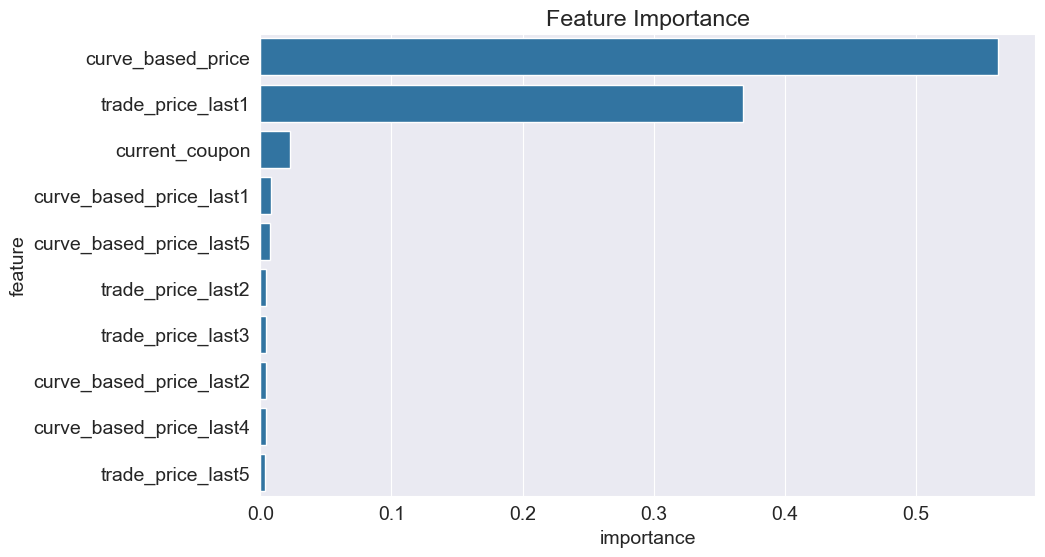

In [46]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=rf1_importance_df.head(10), x='importance', y='feature');